In [2]:
using CairoMakie
using Oceananigans
using Interpolations
using Statistics
using Images

include("../src-fig/plotting.jl")

foldername = "../../scratch/Project/Strain"
iterations, times = iterations_times(foldername)
sp = simulation_parameters(foldername)
xsᶜ, xsᶠ, ysᶜ, ysᶠ, zsᶜ, zsᶠ = grid_nodes(foldername)
inds = centre_indices(foldername)
frames = [1, 31, 157, 278, 400, 500, 600, 700, 800];

In [3]:
function b_to_z(b_depth, zs, b)
    i1 = findfirst(x->x>b, b_depth)
    i1 == nothing && return zs[end]
    i1 == length(b_depth) && return zs[end]
    i2 = i1 + 1
    b_depth[i2] < b_depth[i1] && return zs[i1]
    ξ = max(min((b - b_depth[i1]) / (b_depth[i2] - b_depth[i1]), 1), -1)
    return zs[i1] + (zs[i2] - zs[i1]) * ξ
end

function b_depth_image(b_depth, zs, b)
    return (b_to_z(b_depth, zs, b) - zs[1]) / (zs[end] - zs[1])
end

function b_image(bs, zs, b)
    mapslices(b_depth->b_depth_image(b_depth, zs, b), bs; dims=(3, ))[:, :, 1]
end

b_image (generic function with 1 method)

In [16]:
b_dfm = timeseries_of(a->filt(a, 1, 1)[inds, 1:end-1], joinpath(foldername, "DFM.jld2"), "b_dfm", iterations)
b_dfm = b_dfm .- b_dfm[:, 1:1, end:end]
imag = b_image(filt(b_dfm, 1, 0, 0), zsᶜ, 0)
imag = imag .- max((minimum(imag) - 0.1), 0)
open("b-timeseries.dat", "w") do file
    for j in 1:2:size(imag, 2)
        for i in 1:2:size(imag, 1)
            print(file, "$(imag[i, j]) ");
        end
        println(file, "");
    end
end

In [22]:
findfirst(times ./ (3600 * 24) .> 1)

87

In [12]:
?print

search: print println printstyled sprint isprint morphogradient



```
print([io::IO], xs...)
```

Write to `io` (or to the default output stream [`stdout`](@ref) if `io` is not given) a canonical (un-decorated) text representation. The representation used by `print` includes minimal formatting and tries to avoid Julia-specific details.

`print` falls back to calling `show`, so most types should just define `show`. Define `print` if your type has a separate "plain" representation. For example, `show` displays strings with quotes, and `print` displays strings without quotes.

See also [`println`](@ref), [`string`](@ref), [`printstyled`](@ref).

# Examples

```jldoctest
julia> print("Hello World!")
Hello World!
julia> io = IOBuffer();

julia> print(io, "Hello", ' ', :World!)

julia> String(take!(io))
"Hello World!"
```

---

Convert a file's mode to a string of the form '-rwxrwxrwx'.


In [18]:
frames = 1:50:401
for frame in frames
    imag = get_field(joinpath(foldername, "output.jld2"), "b", iterations[frame]) do field
        b_level = mean(field[1, :, end-2])
        b_image(field[inds, :, :], zsᶜ, b_level)
    end  
    save("images/b-$frame.png", colorview(Gray, imag))
end


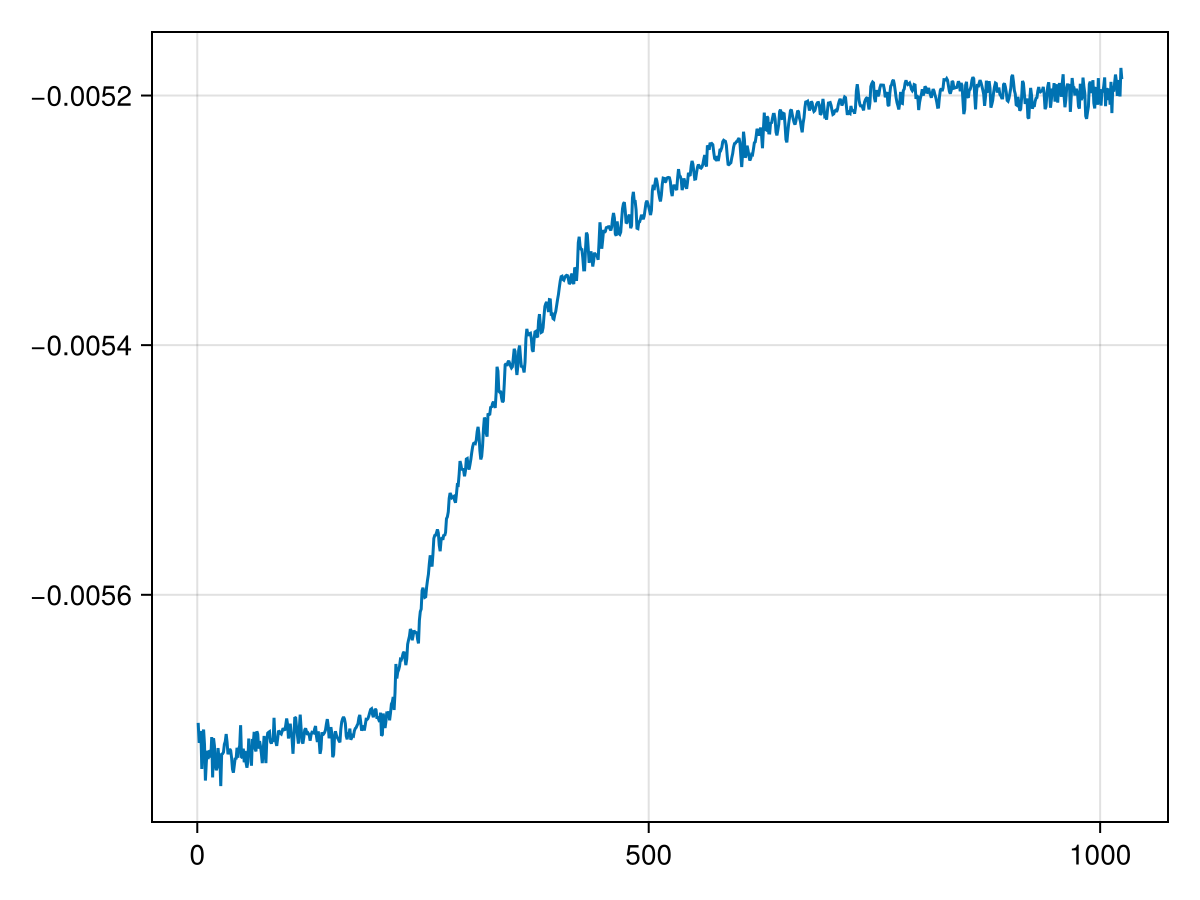

In [70]:
lines(get_field(joinpath(foldername, "output.jld2"), "b", iterations[601])[:, 1, end])

In [53]:
?repeat

search: repeat replace_automatic! KernelFunctionOperation resample_cmap



```
repeat(A::AbstractArray, counts::Integer...)
```

Construct an array by repeating array `A` a given number of times in each dimension, specified by `counts`.

See also: [`fill`](@ref), [`Iterators.repeated`](@ref), [`Iterators.cycle`](@ref).

# Examples

```jldoctest
julia> repeat([1, 2, 3], 2)
6-element Vector{Int64}:
 1
 2
 3
 1
 2
 3

julia> repeat([1, 2, 3], 2, 3)
6×3 Matrix{Int64}:
 1  1  1
 2  2  2
 3  3  3
 1  1  1
 2  2  2
 3  3  3
```

---

```
repeat(A::AbstractArray; inner=ntuple(Returns(1), ndims(A)), outer=ntuple(Returns(1), ndims(A)))
```

Construct an array by repeating the entries of `A`. The i-th element of `inner` specifies the number of times that the individual entries of the i-th dimension of `A` should be repeated. The i-th element of `outer` specifies the number of times that a slice along the i-th dimension of `A` should be repeated. If `inner` or `outer` are omitted, no repetition is performed.

# Examples

```jldoctest
julia> repeat(1:2, inner=2)
4-element Vector{Int64}:
 1
 1
 2
 2

julia> repeat(1:2, outer=2)
4-element Vector{Int64}:
 1
 2
 1
 2

julia> repeat([1 2; 3 4], inner=(2, 1), outer=(1, 3))
4×6 Matrix{Int64}:
 1  2  1  2  1  2
 1  2  1  2  1  2
 3  4  3  4  3  4
 3  4  3  4  3  4
```

---

```
repeat(s::AbstractString, r::Integer)
```

Repeat a string `r` times. This can be written as `s^r`.

See also [`^`](@ref :^(::Union{AbstractString, AbstractChar}, ::Integer)).

# Examples

```jldoctest
julia> repeat("ha", 3)
"hahaha"
```

---

```
repeat(c::AbstractChar, r::Integer) -> String
```

Repeat a character `r` times. This can equivalently be accomplished by calling [`c^r`](@ref :^(::Union{AbstractString, AbstractChar}, ::Integer)).

# Examples

```jldoctest
julia> repeat('A', 3)
"AAA"
```

---

```
repeat(df::AbstractDataFrame; inner::Integer = 1, outer::Integer = 1)
```

Construct a data frame by repeating rows in `df`. `inner` specifies how many times each row is repeated, and `outer` specifies how many times the full set of rows is repeated.

Metadata: this function preserves table-level and column-level `:note`-style metadata.

# Example

```jldoctest
julia> df = DataFrame(a=1:2, b=3:4)
2×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      3
   2 │     2      4

julia> repeat(df, inner=2, outer=3)
12×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      3
   2 │     1      3
   3 │     2      4
   4 │     2      4
   5 │     1      3
   6 │     1      3
   7 │     2      4
   8 │     2      4
   9 │     1      3
  10 │     1      3
  11 │     2      4
  12 │     2      4
```

---

```
repeat(df::AbstractDataFrame, count::Integer)
```

Construct a data frame by repeating each row in `df` the number of times specified by `count`.

Metadata: this function preserves table-level and column-level `:note`-style metadata.

# Example

```jldoctest
julia> df = DataFrame(a=1:2, b=3:4)
2×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      3
   2 │     2      4

julia> repeat(df, 2)
4×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      3
   2 │     2      4
   3 │     1      3
   4 │     2      4
```
